In [1]:
import os
os.chdir('../')
from helpers import *

mousenums:  ['230', '355', '358', '362', '673', '674', '816', '825']


In [2]:
ctypes = []
speedcorrs = []
for mouse in mousenums:
    calc = getcalc(foldnames, mouse, 'epm')
    track, neur, behav = getdicts(foldnames, mouse, 'epm')
    mpos = track['mouse_positionMS']
    speed = np.linalg.norm(np.diff(mpos, axis = 0), axis = 1)
    vel = np.zeros((calc.shape[0], 2))
    vel[0:-1] = np.diff(mpos, axis=0)
    vel[-1] = vel[-2]
    speed /= np.max(speed)
    speed = np.hstack((speed, speed[-1]))
    for cell in range(calc.shape[1]):
        ctypes.append(celltypebehav(calc[:, cell], behav))
        speedcorrs.append(pearsonr(speed, calc[:, cell])[0])
cta = np.array(ctypes)
speedcorrs = np.array(speedcorrs)

In [4]:
np.percentile(speedcorrs, 2.5), np.percentile(speedcorrs, 97.5)

(-0.1686400146237354, 0.20114293855849927)

In [5]:
np.min(speedcorrs), np.max(speedcorrs)

(-0.26555038207142934, 0.3185007224631675)

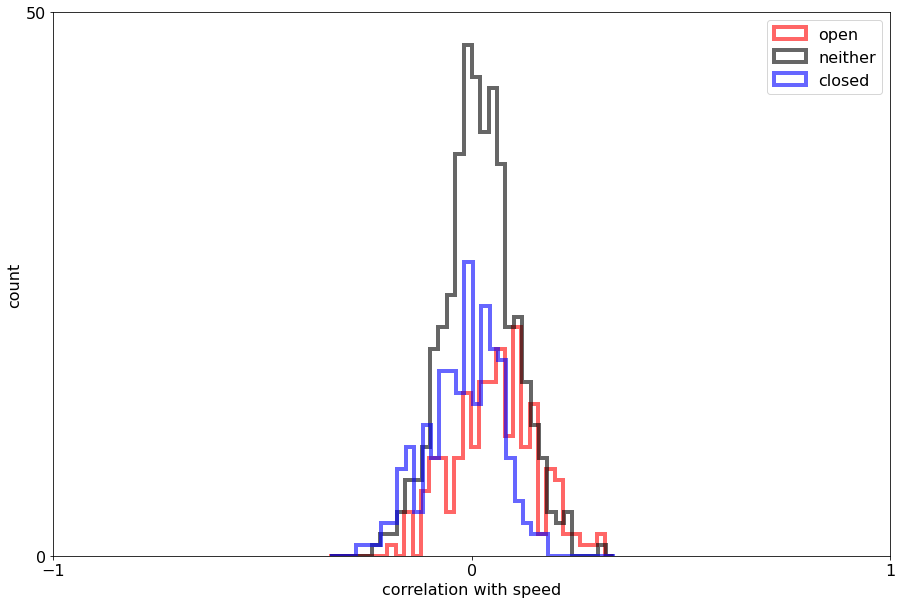

In [3]:
plt.figure(figsize=(15, 10))
colors = ['r', 'k', 'b']
for i, typ in enumerate(['o', 'n', 'c']):
    freqs, bins, _ = plt.hist(speedcorrs[cta==typ], bins=np.linspace(-0.34+i*0.002-0.002, 0.34+i*0.002-0.002, 35), 
                              histtype=u'step', color=colors[i], alpha=0.6, lw=4)
plt.xlabel('correlation with speed')
plt.xlim(-1, 1)
plt.xticks([-1, 0, 1])
plt.ylabel('count')
plt.ylim(0, 50)
plt.yticks([0, 50])
plt.legend(['open', 'neither', 'closed'])
plt.savefig('./elife_figs/2D.svg')